# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [268]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [269]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [270]:
# Definindo os limites das faixas de latitude
bins = [-np.inf, -10.5, np.inf]
labels = ['Abaixo de -10.5', 'Acima de -10.5']

sinasc_raw['Faixa_Latitude'] = pd.cut(sinasc_raw['munResLat'], bins=bins, labels=labels)

In [271]:
# Esse código agrupa os dados com base nas faixas de latitude criadas e exibe as estatísticas para as variáveis IDADEMAE e PESO.
result = sinasc_raw.groupby('Faixa_Latitude')[['IDADEMAE', 'PESO']].agg(
    {
        'sum',      # Soma
        'mean',     # Média
        'min',      # Mínimo
        'max',      # Máximo
        'median',   # Mediana
        'std',      # Desvio padrão
        'var'       # Variância
    }
)

print(result)

                  IDADEMAE                                              \
                       var min       std max     sum median       mean   
Faixa_Latitude                                                           
Abaixo de -10.5  39.947272  12  6.320385  53  340143   26.0  26.178943   
Acima de -10.5   41.572355  11  6.447663  52  365094   25.0  26.014964   

                          PESO                                           \
                           var  min         std   max       sum  median   
Faixa_Latitude                                                            
Abaixo de -10.5  282827.315354  258  531.815114  5985  42098594  3270.0   
Acima de -10.5   309678.570242  295  556.487709  5190  45555148  3275.0   

                              
                        mean  
Faixa_Latitude                
Abaixo de -10.5  3240.098053  
Acima de -10.5   3246.055864  


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [272]:
# Criando as faixas para a área dos municípios
bins_area = [-np.inf, 3000, np.inf]
labels_area = ['Abaixo de 3000', 'Acima de 3000']

sinasc_raw['Faixa_Area'] = pd.cut(sinasc_raw['munResArea'], bins=bins_area, labels=labels_area)

In [273]:
# Aplicando o groupby nas faixas criadas
result_area = sinasc_raw.groupby('Faixa_Area')[['QTDFILVIVO', 'QTDFILMORT']].agg(
    {
        'sum',      # Soma
        'mean',     # Média
        'min',      # Mínimo
        'max',      # Máximo
        'median',   # Mediana
        'std',      # Desvio padrão
        'var'       # Variância
    }
)

print(result_area)

               QTDFILVIVO                                                 \
                      var  min       std   max      sum median      mean   
Faixa_Area                                                                 
Abaixo de 3000   1.156575  0.0  1.075442  30.0   4773.0    1.0  0.924284   
Acima de 3000    1.420268  0.0  1.191750  14.0  22053.0    1.0  1.086890   

               QTDFILMORT                                                
                      var  min       std   max     sum median      mean  
Faixa_Area                                                               
Abaixo de 3000   0.303838  0.0  0.551215   4.0  1260.0    0.0  0.244803  
Acima de 3000    0.395743  0.0  0.629081  28.0  5383.0    0.0  0.272116  


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [274]:
# Criando as faixas de altitude
bins_altitude = [-np.inf, 200, 500, np.inf]
labels_altitude = ['Baixa', 'Média', 'Alta']

sinasc_raw['Faixa_Altitude'] = pd.cut(sinasc_raw['munResAlt'], bins=bins_altitude, labels=labels_altitude)

In [275]:
# Aplicando o groupby nas faixas criadas
result_altitude = sinasc_raw.groupby('Faixa_Altitude')[['APGAR1', 'IDADEPAI']].agg(
    {
        'sum',      # Soma
        'mean',     # Média
        'min',      # Mínimo
        'max',      # Máximo
        'median',   # Mediana
        'std',      # Desvio padrão
        'var'       # Variância
    }
)

print(result_altitude)

                  APGAR1                                                  \
                     var  min       std   max       sum median      mean   
Faixa_Altitude                                                             
Baixa           0.979404  0.0  0.989649  10.0  168862.0    8.0  8.140282   
Média           1.014548  0.0  1.007248  10.0   37229.0    8.0  8.089744   
Alta            0.703190  0.0  0.838564  10.0   13058.0    8.0  8.238486   

                 IDADEPAI                                                    
                      var   min       std   max       sum median       mean  
Faixa_Altitude                                                               
Baixa           61.846510  15.0  7.864255  73.0  145627.0   30.0  31.150160  
Média           58.154997  16.0  7.625942  86.0   85065.0   30.0  30.809489  
Alta            46.414340  18.0  6.812807  60.0    5806.0   34.0  34.152941  


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [276]:
regioes_imediatas = {
    'Porto Velho': ['Porto Velho', 'Candeias do Jamari', 'Itapuã do Oeste', 'Nova Mamoré'],
    'Ariquemes': ['Ariquemes', 'Alto Paraíso', 'Cacaulândia', 'Monte Negro', 'Rio Crespo', 'Vale do Anari'],
    'Ji-Paraná': ['Ji-Paraná', 'Presidente Médici', 'Teixeirópolis', 'Urupá', 'Vale do Paraíso', 'Nova Brasilândia D\'Oeste'],
    'Ouro Preto do Oeste': ['Ouro Preto do Oeste', 'Mirante da Serra', 'Nova União', 'Vale do Paraíso', 'Alvorada D\'Oeste'],
    'Jaru': ['Jaru', 'Governador Jorge Teixeira', 'Theobroma'],
    'Machadinho D\'Oeste': ['Machadinho D\'Oeste', 'Vale do Anari'],
    'Cacoal': ['Cacoal', 'Espigão D\'Oeste', 'Ministro Andreazza'],
    'Pimenta Bueno': ['Pimenta Bueno', 'Primavera de Rondônia', 'São Felipe D\'Oeste'],
    'Vilhena': ['Vilhena', 'Chupinguaia', 'Corumbiara', 'Parecis'],
    'Colorado do Oeste': ['Colorado do Oeste', 'Cabixi', 'Cerejeiras', 'Pimenteiras do Oeste'],
    'Rolim de Moura': ['Rolim de Moura', 'Alta Floresta D\'Oeste', 'Alto Alegre dos Parecis', 'Santa Luzia D\'Oeste', 'Novo Horizonte do Oeste', 'Castanheiras'],
    'Cerejeiras': ['Cerejeiras', 'Corumbiara', 'Pimenteiras do Oeste'],
    'Guajará-Mirim': ['Guajará-Mirim'],
    'Buritis': ['Buritis', 'Campo Novo de Rondônia', 'Cujubim'],
    'Costa Marques': ['Costa Marques', 'São Francisco do Guaporé', 'Seringueiras', 'São Miguel do Guaporé']
}

In [277]:
sinasc_raw = sinasc_raw[sinasc_raw['munResNome'] != 'Município ignorado - RO']

In [278]:
# Adicionando uma nova coluna no dataframe que indique a região imediata de cada município
def mapeia_regiao(municipio):
    for regiao, municipios in regioes_imediatas.items():
        if municipio in municipios:
            return regiao
    return None

sinasc_raw['Regiao_Imediata'] = sinasc_raw['munResNome'].apply(mapeia_regiao)

In [279]:
# Calculando a idade média das mulheres por região imediata ao longo do tempo (usando a coluna DTNASC).
sinasc_raw['Ano_Nascimento'] = pd.to_datetime(sinasc_raw['DTNASC']).dt.year
media_idades = sinasc_raw.groupby(['Ano_Nascimento', 'Regiao_Imediata'])['IDADEMAE'].mean().reset_index()

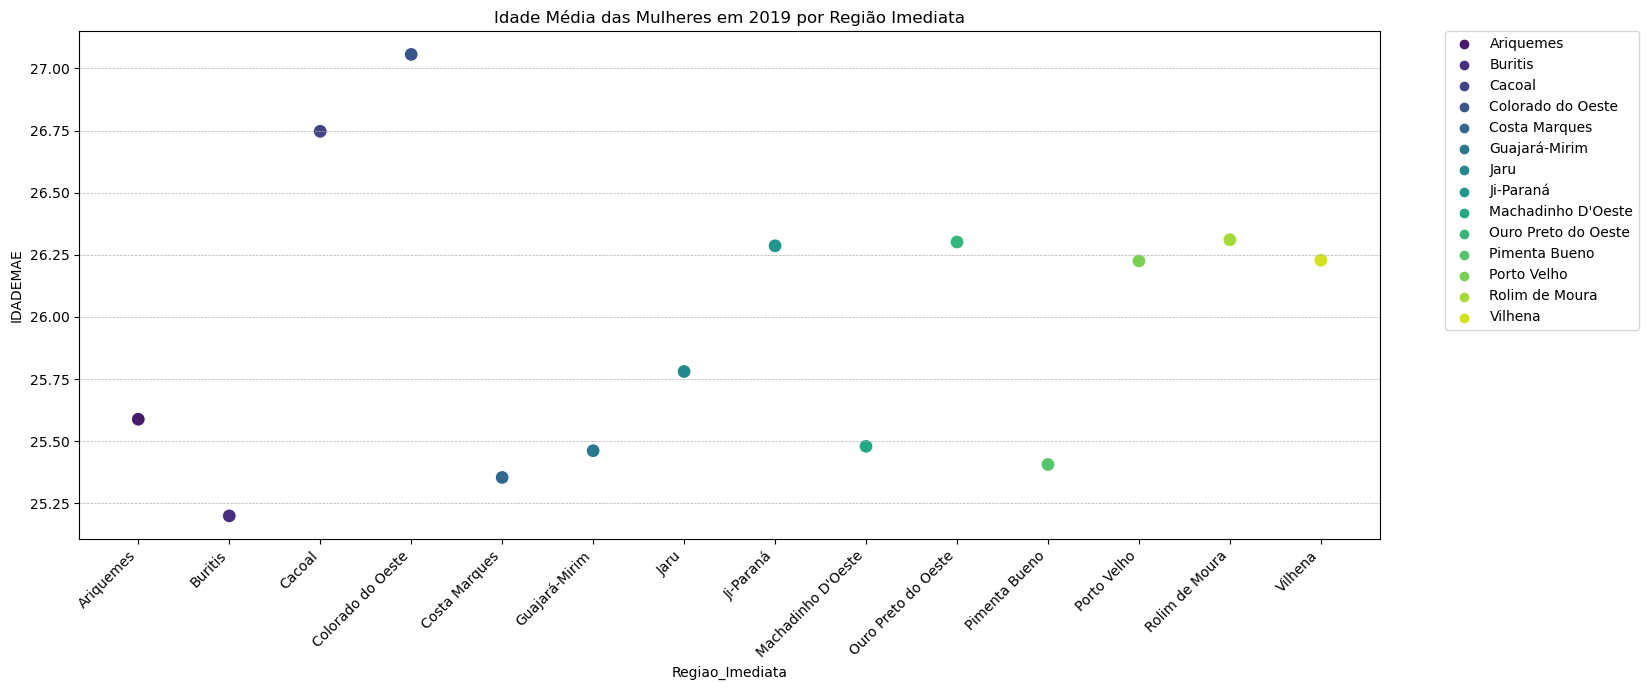

In [280]:
# Plotando o gráfico
plt.figure(figsize=(14, 7))
sns.scatterplot(data=media_idades, x='Regiao_Imediata', y='IDADEMAE', hue='Regiao_Imediata', palette='viridis', s=100)
plt.title('Idade Média das Mulheres em 2019 por Região Imediata')
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [281]:
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M"
df_idh = pd.read_html(url, header=0)[0]  # Pegando a primeira tabela da página

In [282]:
df_idh.columns = ['Posição', 'Município', 'IDH municipal', 'IDH renda', 'IDH longevidade', 'IDH educação']

In [283]:
df_idh = df_idh[df_idh['IDH municipal'].str.contains(r'[.,]')]

In [284]:
df_idh['IDH municipal'] = df_idh['IDH municipal'].str.replace(',', '.').astype(float)

In [285]:
faixas_idh = {
    (0, 0.499): 'Muito baixo',
    (0.500, 0.599): 'Baixo',
    (0.600, 0.699): 'Médio',
    (0.700, 0.799): 'Alto',
    (0.800, 1): 'Muito alto'
}

# Convertendo o dicionário para um DataFrame
df_faixas = pd.DataFrame(list(faixas_idh.items()), columns=['Intervalo', 'Classificação'])

# Supondo que você já tem o DataFrame df_idh com a coluna 'IDH municipal'
df_idh['Faixa_IDH'] = df_idh['IDH municipal'].apply(lambda x: next((v for k, v in faixas_idh.items() if k[0] <= x < k[1]), None))

# Função para imprimir um DataFrame em formato de tabela com título
def print_dataframe_table(df, title):
    print(f"\n{title}\n")
    print(df.to_string(index=False))

# Imprimir as tabelas
print_dataframe_table(df_faixas, "Tabela de Faixas de IDH")
print_dataframe_table(df_idh, "Tabela de IDH Municipal")



Tabela de Faixas de IDH

   Intervalo Classificação
  (0, 0.499)   Muito baixo
(0.5, 0.599)         Baixo
(0.6, 0.699)         Médio
(0.7, 0.799)          Alto
    (0.8, 1)    Muito alto

Tabela de IDH Municipal

Posição                 Município  IDH municipal IDH renda IDH longevidade IDH educação Faixa_IDH
      1               Porto Velho          0.736     0.764           0.819        0.638      Alto
      2                   Vilhena          0.731     0.734           0.808        0.659      Alto
      3                    Cacoal          0.718     0.727           0.821        0.620      Alto
      4                 Ji-Paraná          0.714     0.728           0.810        0.617      Alto
      5             Pimenta Bueno          0.710     0.726           0.803        0.613      Alto
      6                 Ariquemes          0.702     0.716           0.806        0.600      Alto
      7            Rolim de Moura          0.700     0.709           0.808        0.598      Alto
  

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [286]:
# 1. Carregando os dados da página web
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM"
tabelas = pd.read_html(url, decimal=',', thousands='.')
df = tabelas[0]

In [287]:
# 2. Definindo as faixas de classificação
faixas = {
    'Desenvolvimento alto': (0.8, 1.0),
    'Desenvolvimento moderado': (0.6, 0.8),
    'Desenvolvimento regular': (0.4, 0.6),
    'Desenvolvimento baixo': (0, 0.4)
}

In [288]:
# 3. Criando uma função de classificação
def classifica_por_faixa(valor):
    try:
        valor_float = float(valor) / 100  # Convertendo para uma escala de 0 a 1
        for chave, (minimo, maximo) in faixas.items():
            if minimo <= valor_float < maximo:
                return chave
    except:
        pass
    return 'Sem classificação'

In [289]:
# 4. Aplicando a função de classificação ao DataFrame
coluna_ifdm = ('IFDM Consolidado (2013)', 'Desenvolvimento alto')
df['Categoria IFDM'] = df[coluna_ifdm].apply(classifica_por_faixa)

In [293]:
# 5. Visualizando o resultado
def print_dataframe(df, col_width=20):
    # Printando os nomes das colunas
    headers = df.columns.get_level_values(0)
    header_line = ''.join([header.ljust(col_width) for header in headers])
    print(header_line)
    print('-'*len(header_line))  # linha separadora

    # Printando cada linha do DataFrame
    for index, row in df.iterrows():
        line = ''.join([str(value).ljust(col_width) for value in row])
        print(line)

print_dataframe(df)

Posição             Município           IFDM Consolidado (2013)Categoria IFDM      
-----------------------------------------------------------------------------------
nenhum município    nenhum município    nenhum município    Sem classificação   
Desenvolvimento moderadoDesenvolvimento moderadoDesenvolvimento moderadoSem classificação   
1º                  Ariquemes           07746               Sem classificação   
2º                  Vilhena             07465               Sem classificação   
3º                  Pimenta Bueno       07383               Sem classificação   
4º                  Porto Velho         07257               Sem classificação   
5º                  Ji-Paraná           07117               Sem classificação   
6º                  Cacoal              07111               Sem classificação   
7º                  Santa Luzia d'Oeste 06850               Sem classificação   
8º                  Rolim de Moura      06785               Sem classificação   
9º        

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [297]:
url_pib = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB"
tabelas_pib = pd.read_html(url_pib, decimal=',', thousands='.')

In [299]:
# 1. Ajustar o header da tabela
df_pib = tabelas_pib[0].copy()
df_pib.columns = ['Posição', 'Mudança', 'Município', 'PIB', 'Alteração']

# Drop do primeiro índice, que é redundante após o ajuste
df_pib = df_pib.iloc[1:]

# 2. Limpeza de Dados
# Remover espaços da coluna PIB e converter para int
df_pib['PIB'] = df_pib['PIB'].str.replace(' ', '').astype(int)

# Exibindo todas as cidades em formato colunar com espaçamentos
for index, row in df_pib.iterrows():
    print("{:<10} {:<15} {:<30} {:<15} {:<10}".format(
        row["Posição"],
        row["Mudança"],
        row["Município"],
        row["PIB"],
        row["Alteração"]
    ))

2          (0)             Ji-Paraná                      3783972         nan       
3          (0)             Vilhena                        2831175         nan       
4          (0)             Ariquemes                      2579830         nan       
5          (0)             Cacoal                         2261644         nan       
6          (0)             Jaru                           1500890         nan       
7          (0)             Rolim de Moura                 1283434         nan       
8          (0)             Pimenta Bueno                  1164877         nan       


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

- Eu descobri a cidade de Ariquemes está em 6º lugar no IDH municipal, o que indica uma classificação Alta entre as demais cidades.
- Ela está em 1ª posição no IFDM
- A idade média das mulheres em ariquemes é 27 anos.
- Ariquemes está no PIB acima de 1 bilhão.

- Eu descobri que a cidade de Buritis está em 36º lugar, no IDH municipal, o que indica uma classificação Média.
- Está em 20º posição no IFDM.
- A idade média das mulheres é abaixo de 25 anos.
- Enquanto Buritis está acima de 500 milhões.